In [30]:
import concurrent.futures
from pytube import YouTube, Playlist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

def get_video_info(url: str) -> dict:
    """Get video info
    
    Args:
        url (str): video url

    Returns:
        dict: video info
    """
    yt = YouTube(url)
    return {key: getattr(yt, key) for key in ('title', 'author', 'publish_date', 'watch_url', 'channel_url', 'length')}

def load_playlist_info(url: str):
    """Load video info from a playlist

    Args:
        url (str): playlist url

    Returns:
        list: list of video info
    """
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        pl = Playlist(url)
        for url in pl.video_urls:
            future = executor.submit(get_video_info, url)
            futures.append(future)
        rst = [future.result() for future in concurrent.futures.as_completed(futures)]
    return pd.DataFrame(rst)

def plot_publish_date(df: pd.DataFrame, title: str):
    """Plot publish date
    
    Args:
        df (pd.DataFrame): video info dataframe
    """
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_title(title, fontsize=16, fontweight='bold')
    sns.histplot(df["publish_date"], kde=True, bins=100, stat="percent", ax=ax)
    plt.show()
    plt.close(fig)

def plot_author(df: pd.DataFrame, title: str, n_top: int):
    """Plot author
    
    Args:
        df (pd.DataFrame): video info dataframe
        title (str): plot title
        n_top (int): number of top authors
    """
    fig, ax = plt.subplots(figsize=(30, 3))
    ax.set_title(title, fontsize=16, fontweight='bold')
    sns.barplot(df["author"].value_counts()[:n_top], ax=ax)
    plt.show()
    plt.close(fig)


In [10]:
rst1 = load_playlist_info("https://www.youtube.com/playlist?list=PLSw6ZyEd7uB0kSWLvXkawKlbdDBrlN7Qk")  # 2023-11-21 ~ 2024-04-27
rst2 = load_playlist_info("https://www.youtube.com/playlist?list=PLSw6ZyEd7uB1NcncDPCHymc_CKF_HyZ40")  # 2023-02-12 ~ 2023-11-21
rst3 = load_playlist_info("https://www.youtube.com/playlist?list=PLSw6ZyEd7uB1b0gex-PYqhkw8iRTWlZus")  # 2022-06-28 ~ 2023-02-11
rst4 = load_playlist_info("https://www.youtube.com/playlist?list=PLSw6ZyEd7uB3XE4eEqdoiAOrjFIXchjIO")  #            ~ 2022-06-28
rst = pd.concat([rst1, rst2, rst3, rst4])

# 1. Publish date

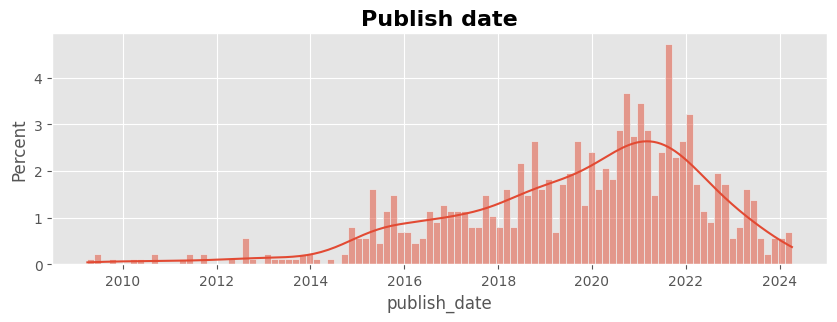

In [53]:
plot_publish_date(rst, title="Publish date")

In [71]:
rst_hot_years = rst[(2020 <= rst.publish_date.dt.year) & (rst.publish_date.dt.year < 2022)].sort_values("publish_date")
rst_hot_years

,title,author,publish_date,watch_url,channel_url,length
42,再考 歌ってみた【倚水】,ISUI,2020-01-04,https://youtube.com/watch?v=ApMj2rxlguc,https://www.youtube.com/channel/UCSoO5oBPgBG_-...,199
222,ハイドアンド・シーク 歌ってみた【倚水】,ISUI,2020-01-04,https://youtube.com/watch?v=hKV4X4tVflA,https://www.youtube.com/channel/UCSoO5oBPgBG_-...,266
137,ジャンキーナイトタウンオーケストラ / すりぃ(Cover) めいちゃん,Meychan,2020-01-09,https://youtube.com/watch?v=OwO912ASh3I,https://www.youtube.com/channel/UCLkxbtUqIudgG...,213
215,Ougon no Kagayaki,ReoNa,2020-01-14,https://youtube.com/watch?v=7LC2hSxxX8o,https://www.youtube.com/channel/UCv8_ZHaN1nPlQ...,300
165,TatshMusicCircle - 鏡面世界,Геракл,2020-01-15,https://youtube.com/watch?v=OWsjbrLQ8EU,https://www.youtube.com/channel/UC1VJuHbJVr9-h...,261
...,...,...,...,...,...,...
55,Omokage (produced by Vaundy),"milet, Aimer, & Lilas Ikuta",2021-12-16,https://youtube.com/watch?v=jg-uSq64Ru8,https://www.youtube.com/channel/UCM3FfEkGhmE07...,188
45,"In Hell We Live, Lament",Mili,2021-12-20,https://youtube.com/watch?v=Ea8VCdy7LfM,https://www.youtube.com/channel/UC-wNqHVYS82PF...,224
64,Touch off Live 『약속의 네버랜드 오프닝』 [UVERworld/우버월드],uverworld _koreafan,2021-12-27,https://youtube.com/watch?v=trZKF9qp60M,https://www.youtube.com/channel/UCvfGHGNlqIfvc...,256
209,【歌ってみた】海の幽霊 / covered by ヰ世界情緒,Isekaijoucho,2021-12-28,https://youtube.com/watch?v=pE70G28UIGc,https://www.youtube.com/channel/UCah4_WVjmr8XA...,247


c:\Users\dj.yoon\AppData\Local\pypoetry\Cache\virtualenvs\youtube-playlist-extractor-AM5uW_rD-py3.10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dj.yoon\AppData\Local\pypoetry\Cache\virtualenvs\youtube-playlist-extractor-AM5uW_rD-py3.10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dj.yoon\AppData\Local\pypoetry\Cache\virtualenvs\youtube-playlist-extractor-AM5uW_rD-py3.10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48533 (\N{HANGUL SYLLABLE BUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dj.yoon\AppData\Local\pypoetry\Cache\virtualenvs\youtube-playlist-extractor-AM5uW_rD-py3.10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44340 (\N{HANGUL S

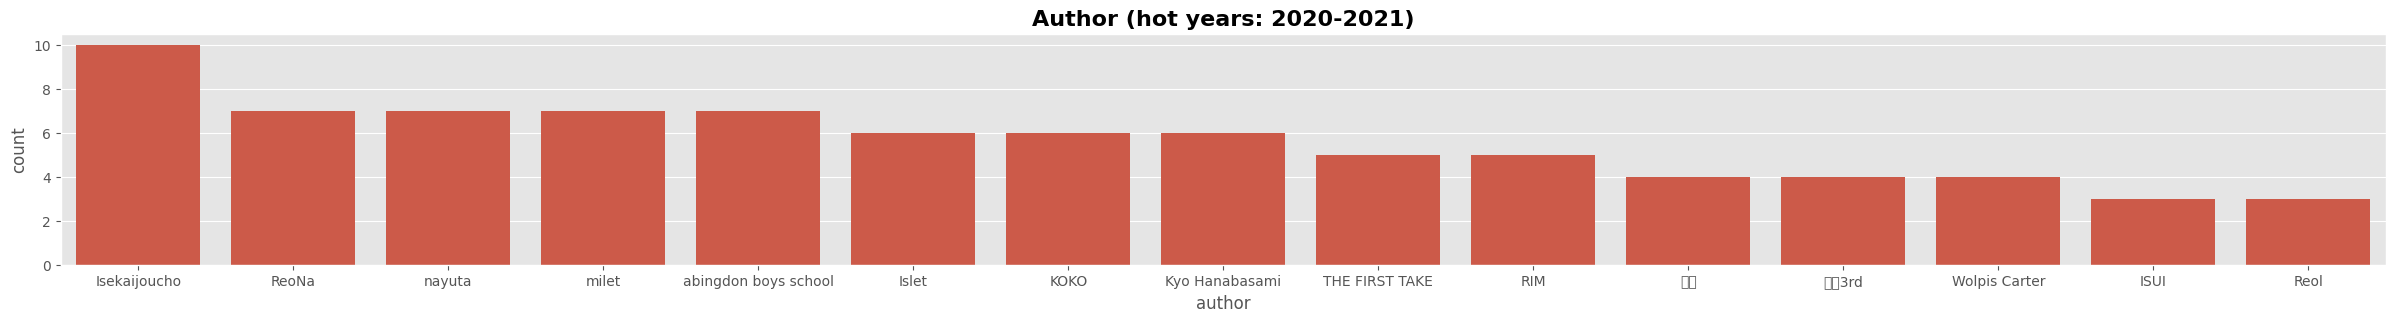

In [72]:
plot_author(rst_hot_years, title="Author (hot years: 2020-2021)", n_top=15)

# 2. Author

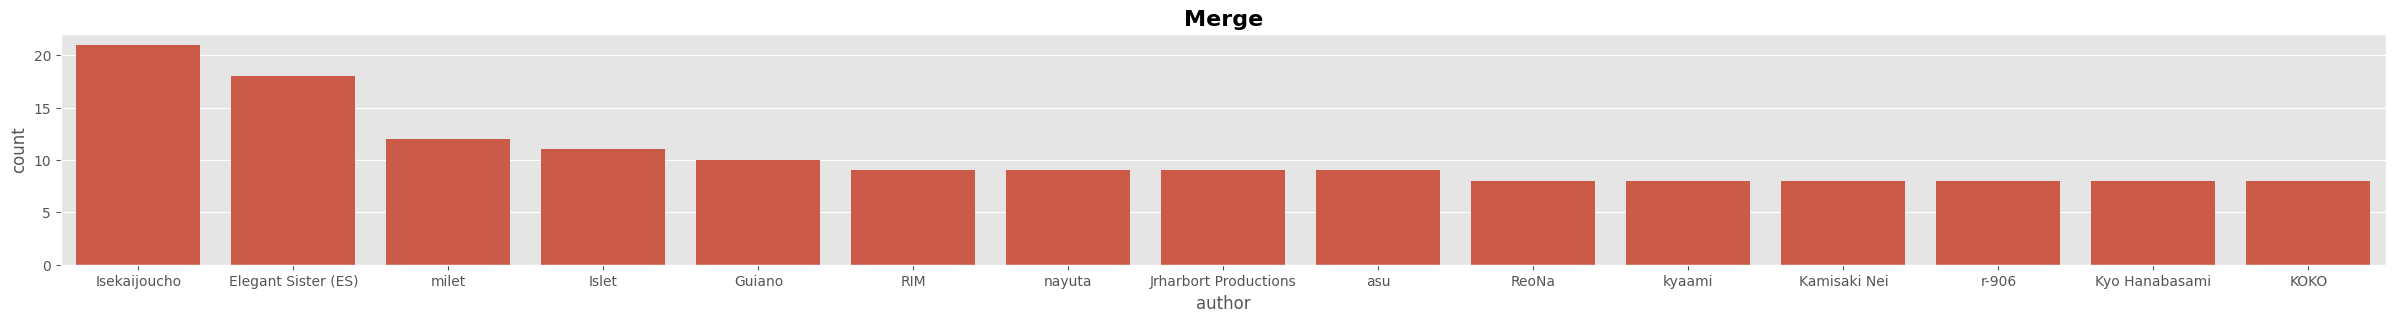

In [60]:
plot_author(rst, title="Merge", n_top=15)